In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
car_df = pd.read_csv('finalcarpre.csv')
car_df.head()

,bt,km,ownerNo,oem,model,modelYear,price,Insurance Validity,Fuel Type,Transmission,Mileage,Seats_1,City,Color,top_features_count
0,Hatchback,120000,3,Maruti,Maruti Celerio,2015,400000.0,Third Party insurance,Petrol,Manual,23.0,5.0,Bangalore,Others,9.0
1,SUV,32706,2,Ford,Ford Ecosport,2018,811000.0,Comprehensive,Petrol,Manual,17.0,5.0,Bangalore,Others,9.0
2,Hatchback,11949,1,Tata,Tata Tiago,2018,585000.0,Comprehensive,Petrol,Manual,23.0,5.0,Bangalore,Others,9.0
3,Sedan,17794,1,Hyundai,Hyundai Xcent,2014,462000.0,Comprehensive,Petrol,Manual,19.0,5.0,Bangalore,Others,9.0
4,SUV,60000,1,Maruti,Maruti SX4 S Cross,2015,790000.0,Third Party insurance,Diesel,Manual,23.0,5.0,Bangalore,Others,9.0


In [3]:
car_df.describe()

,km,ownerNo,modelYear,price,Mileage,Seats_1,top_features_count
count,8.285000e+03,8285.000000,8285.000000,8.285000e+03,8285.000000,8285.000000,8285.000000
mean,5.896617e+04,1.357272,2016.514424,9.591942e+05,18.819553,5.202173,8.818467
std,7.434042e+04,0.637860,3.909551,1.421351e+06,3.979111,0.662542,0.818586
min,0.000000e+00,0.000000,1985.000000,2.016100e+04,7.000000,2.000000,0.000000
25%,3.000000e+04,1.000000,2014.000000,4.000000e+05,17.000000,5.000000,9.000000
50%,5.369200e+04,1.000000,2017.000000,6.020000e+05,18.000000,5.000000,9.000000
75%,8.000000e+04,2.000000,2019.000000,9.500000e+05,21.000000,5.000000,9.000000
max,5.500000e+06,5.000000,2023.000000,4.150000e+07,140.000000,10.000000,9.000000


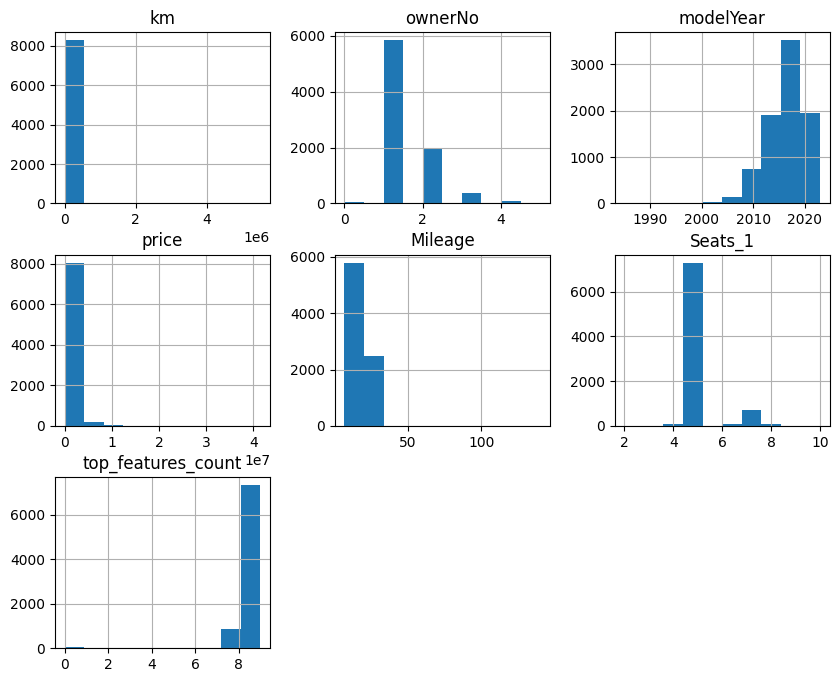

In [4]:
#Plotting histogram
car_df.hist(figsize=(10,8))
plt.show()

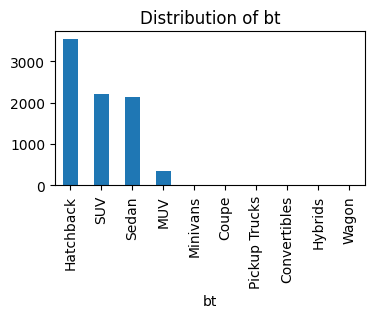

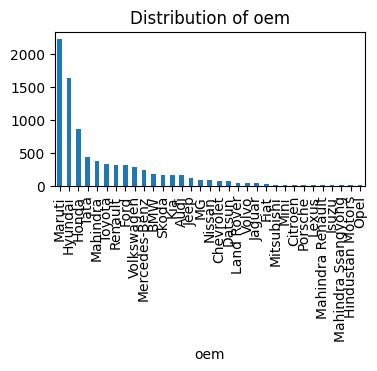

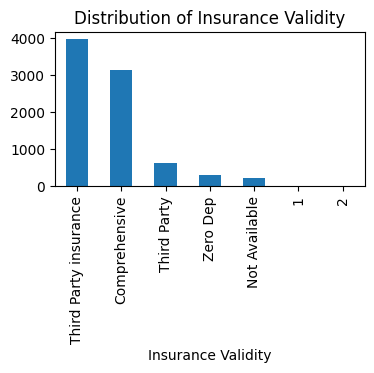

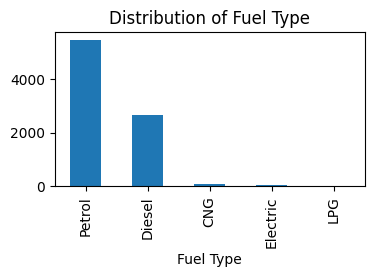

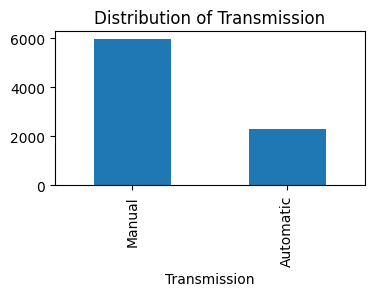

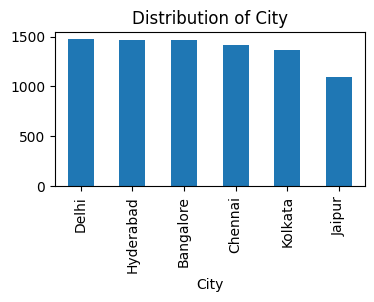

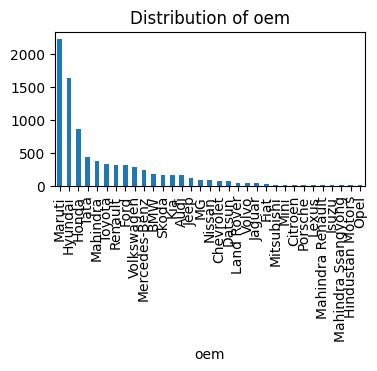

In [5]:
categorical_cols = ['bt', 'oem', 'Insurance Validity', 'Fuel Type', 
                    'Transmission', 'City','oem']

for col in categorical_cols:
    plt.figure(figsize=(4, 2))
    car_df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()

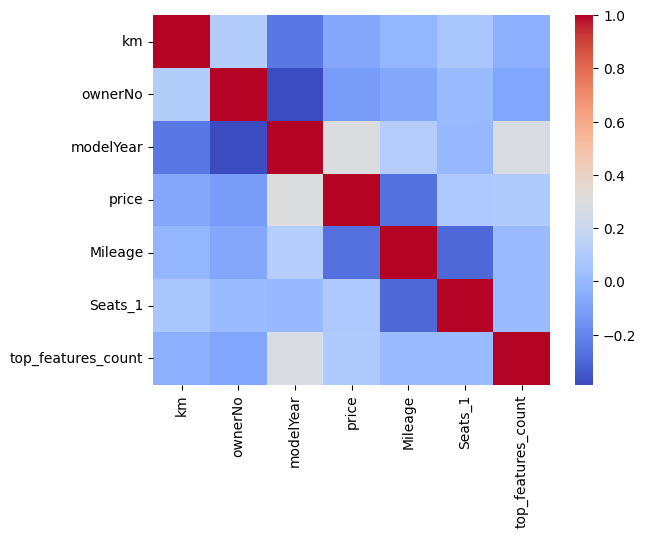

In [6]:
#Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_columns = car_df.select_dtypes(include=[np.number]).columns.tolist()

correlation_matrix = car_df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

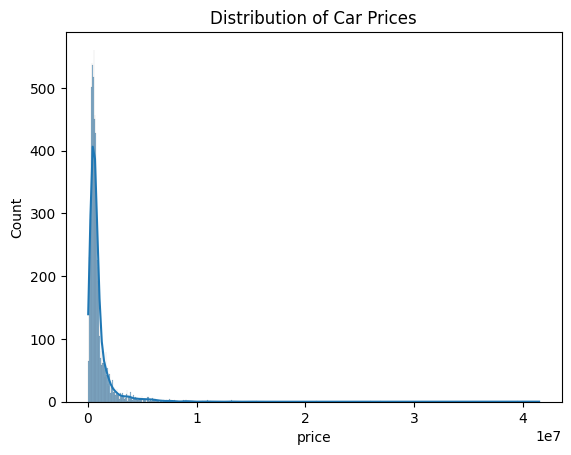

In [7]:
sns.histplot(car_df['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.show()

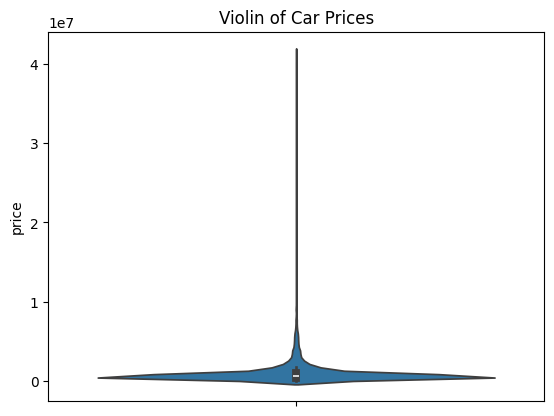

In [8]:
#Violin Graph
sns.violinplot(car_df['price'])
plt.title('Violin of Car Prices')
plt.show()

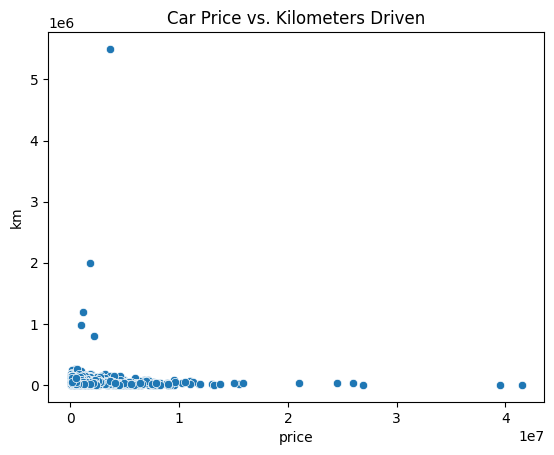

In [9]:
sns.scatterplot(x='price', y='km', data=car_df)
plt.title('Car Price vs. Kilometers Driven')
plt.show()

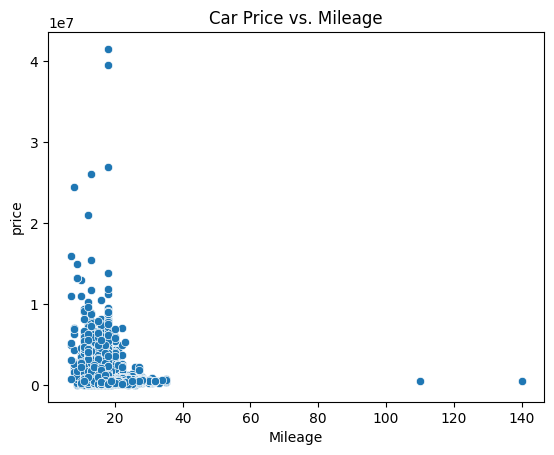

In [10]:
sns.scatterplot(x='Mileage', y='price', data=car_df)
plt.title('Car Price vs. Mileage')
plt.show()

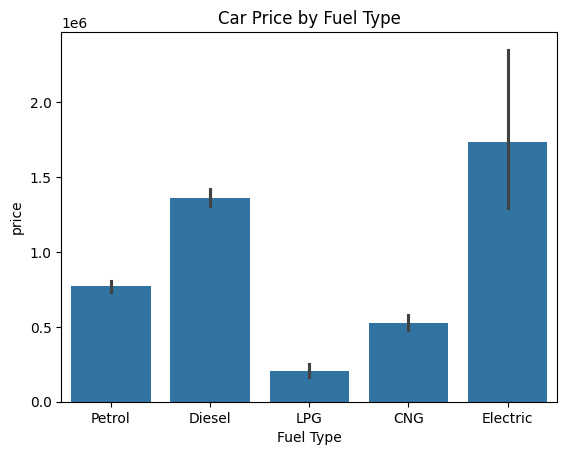

In [11]:
sns.barplot(x='Fuel Type', y='price', data=car_df)
plt.title('Car Price by Fuel Type')
plt.show()

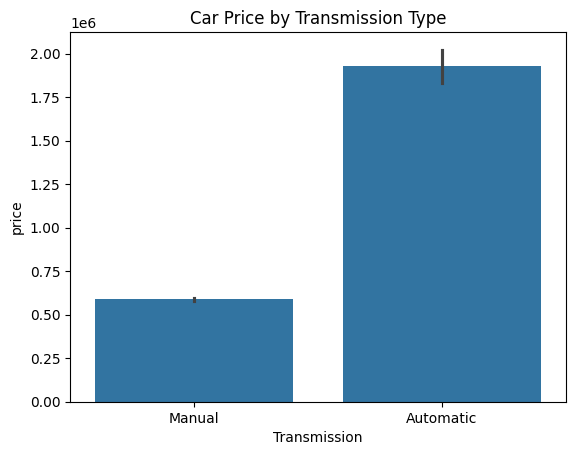

In [12]:
sns.barplot(x='Transmission', y='price', data=car_df)
plt.title('Car Price by Transmission Type')
plt.show()

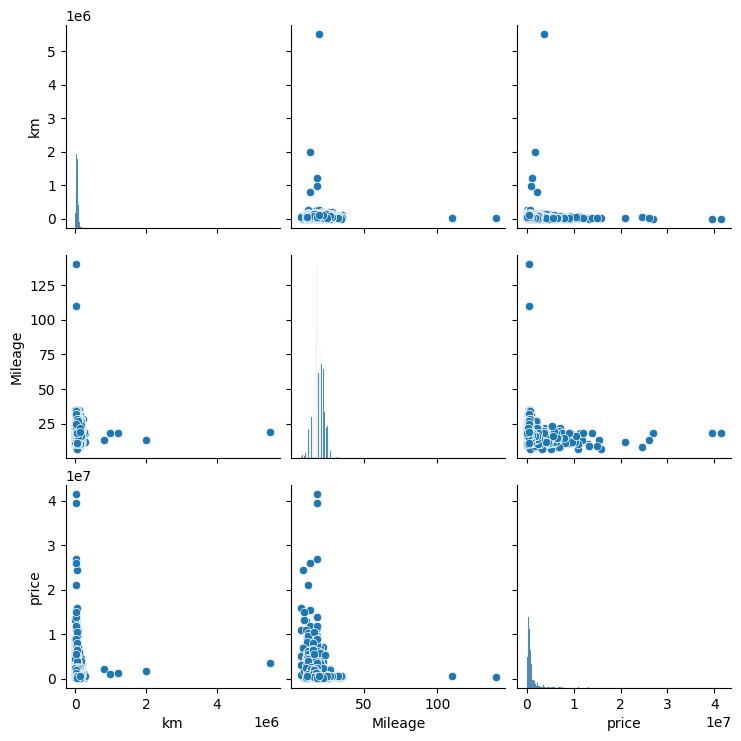

In [13]:
sns.pairplot(car_df, vars=['km', 'Mileage', 'price'])
plt.show()

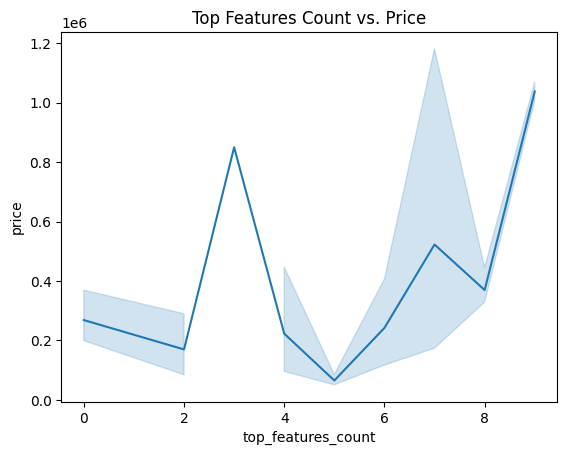

In [14]:
#LinePlot
sns.lineplot(x='top_features_count', y='price', data=car_df)
plt.title('Top Features Count vs. Price')
plt.show()

In [15]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8285 entries, 0 to 8284
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bt                  8285 non-null   object 
 1   km                  8285 non-null   int64  
 2   ownerNo             8285 non-null   int64  
 3   oem                 8285 non-null   object 
 4   model               8285 non-null   object 
 5   modelYear           8285 non-null   int64  
 6   price               8285 non-null   float64
 7   Insurance Validity  8285 non-null   object 
 8   Fuel Type           8285 non-null   object 
 9   Transmission        8285 non-null   object 
 10  Mileage             8285 non-null   float64
 11  Seats_1             8285 non-null   float64
 12  City                8285 non-null   object 
 13  Color               8285 non-null   object 
 14  top_features_count  8285 non-null   float64
dtypes: float64(4), int64(3), object(8)
memory usage: 971.0+

In [16]:
percentage_distribution = car_df['bt'].value_counts(normalize=True) * 100

# Display result
print(percentage_distribution)

bt
Hatchback        42.739891
SUV              26.638503
Sedan            25.926373
MUV               4.152082
Minivans          0.253470
Coupe             0.120700
Pickup Trucks     0.072420
Convertibles      0.072420
Hybrids           0.012070
Wagon             0.012070
Name: proportion, dtype: float64


In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from joblib import dump
le_bt = LabelEncoder()

# Apply Label Encoding
car_df['bt'] = le_bt.fit_transform(car_df['bt'])
dump(le_bt, 'le_bt.pkl') 


['le_bt.pkl']

In [18]:
percentage_distribution = car_df['oem'].value_counts(normalize=True) * 100

# Display result
print(percentage_distribution)

oem
Maruti                26.867833
Hyundai               19.758600
Honda                 10.331925
Tata                   5.178033
Mahindra               4.502112
Toyota                 3.898612
Renault                3.729632
Ford                   3.705492
Volkswagen             3.452022
Mercedes-Benz          2.933011
BMW                    2.196741
Skoda                  1.919131
Kia                    1.894991
Audi                   1.882921
Jeep                   1.351841
MG                     1.062161
Nissan                 0.941460
Chevrolet              0.917320
Datsun                 0.893180
Land Rover             0.531080
Volvo                  0.494870
Jaguar                 0.410380
Fiat                   0.362100
Mitsubishi             0.156910
Mini                   0.144840
Citroen                0.096560
Porsche                0.072420
Lexus                  0.060350
Mahindra Renault       0.060350
Isuzu                  0.060350
Mahindra Ssangyong     0.048280
Hind

In [19]:
import pickle
from joblib import dump


freq_encoding_oem = car_df['oem'].value_counts().to_dict()


car_df['oem'] = car_df['oem'].map(freq_encoding_oem)

dump(freq_encoding_oem, 'fr_oem.pkl')

['fr_oem.pkl']

In [20]:
percentage_distribution = car_df['model'].value_counts(normalize=True) * 100

# Display result
print(percentage_distribution)

model
Honda City              4.417622
Maruti Swift            4.200362
Hyundai i20             3.958962
Maruti Baleno           3.524442
Hyundai Grand i10       3.126132
                          ...   
Volkswagen CrossPolo    0.012070
Tata Sumo Victa         0.012070
Mercedes-Benz AMG GT    0.012070
Audi S5 Sportback       0.012070
Jaguar F-TYPE           0.012070
Name: proportion, Length: 315, dtype: float64


In [21]:
freq_encoding_model = car_df['model'].value_counts().to_dict()

# Apply frequency encoding
car_df['model']= car_df['model'].map(freq_encoding_model)
dump(freq_encoding_model, 'fr_model.pkl')

['fr_model.pkl']

In [22]:
percentage_distribution = car_df['Insurance Validity'].value_counts(normalize=True) * 100

# Display result
print(percentage_distribution)

Insurance Validity
Third Party insurance    48.002414
Comprehensive            37.996379
Third Party               7.604104
Zero Dep                  3.657212
Not Available             2.691611
1                         0.036210
2                         0.012070
Name: proportion, dtype: float64


In [23]:
freq_encoding_iv = car_df['Insurance Validity'].value_counts().to_dict()

# Apply frequency encoding
car_df['Insurance Validity']= car_df['Insurance Validity'].map(freq_encoding_iv)
dump(freq_encoding_iv, 'fr_iv.pkl')

['fr_iv.pkl']

In [24]:
percentage_distribution = car_df['Fuel Type'].value_counts(normalize=True) * 100

# Display result
print(percentage_distribution)

Fuel Type
Petrol      66.276403
Diesel      32.033796
CNG          1.158721
Electric     0.337960
LPG          0.193120
Name: proportion, dtype: float64


In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le_fuel = LabelEncoder()
car_df['Fuel Type'] = le_fuel.fit_transform(car_df['Fuel Type'])
dump(le_fuel, 'le_fuel.pkl')

['le_fuel.pkl']

In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le_transmission = LabelEncoder()
car_df['Transmission'] = le_transmission.fit_transform(car_df['Transmission'])
dump(le_transmission, 'le_transmission.pkl')

['le_transmission.pkl']

In [27]:
percentage_distribution = car_df['Color'].value_counts(normalize=True) * 100

# Display result
print(percentage_distribution)

Color
Others                  38.286059
White                   16.511768
Silver                  12.661436
Red                      7.555824
Blue                     6.022933
                          ...    
Cherry Red               0.012070
golden brown             0.012070
Technometgrn+Gryroof     0.012070
Light Silver             0.012070
Out Back Bronze          0.012070
Name: proportion, Length: 145, dtype: float64


In [28]:
freq_encoding_color= car_df['Color'].value_counts().to_dict()

# Apply frequency encoding
car_df['Color']= car_df['Color'].map(freq_encoding_color)
dump(freq_encoding_color, 'fr_color.pkl')

['fr_color.pkl']

In [29]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le_city = LabelEncoder()
car_df['City'] = le_city.fit_transform(car_df['City'])
dump(le_city, 'le_city.pkl')

['le_city.pkl']

In [30]:
le_modelYear = LabelEncoder()
car_df['modelYear'] = le_modelYear.fit_transform(car_df['modelYear'])
dump(le_modelYear, 'le_modelYear.pkl')

['le_modelYear.pkl']

In [31]:

le_ownerNo = LabelEncoder()
car_df['ownerNo'] = le_ownerNo.fit_transform(car_df['ownerNo'])
dump(le_ownerNo, 'le_ownerNo.pkl') 

['le_ownerNo.pkl']

In [32]:
car_df.to_csv("car_df_encoded.csv",index=False)

C:\Users\rs\AppData\Local\Temp\ipykernel_18880\617057881.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(car_df['price'], shade=True, color='blue')


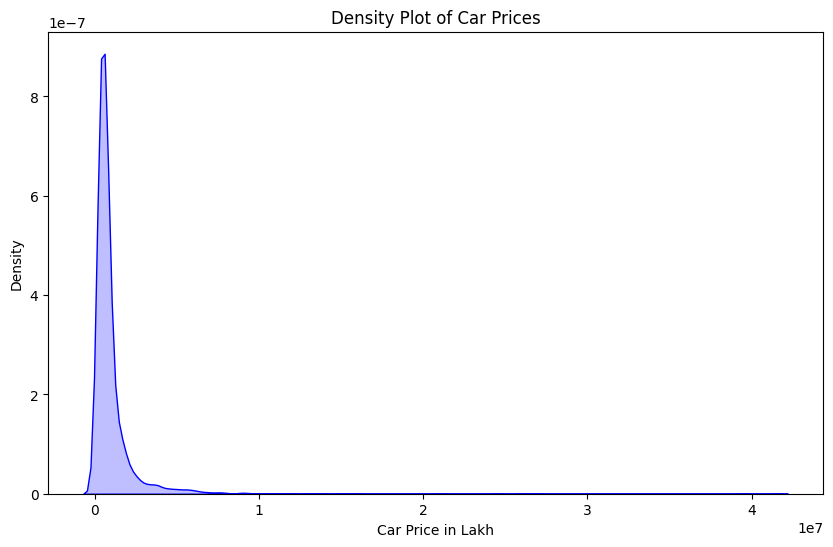

In [33]:
#Checking Skewness
plt.figure(figsize=(10, 6))
sns.kdeplot(car_df['price'], shade=True, color='blue')
plt.title('Density Plot of Car Prices')
plt.xlabel('Car Price in Lakh')
plt.ylabel('Density')
plt.show()

In [34]:
from scipy.stats import skew

skewness = skew(car_df['price'])
print(f"Skewness : {skewness}")

Skewness : 9.987485009351198


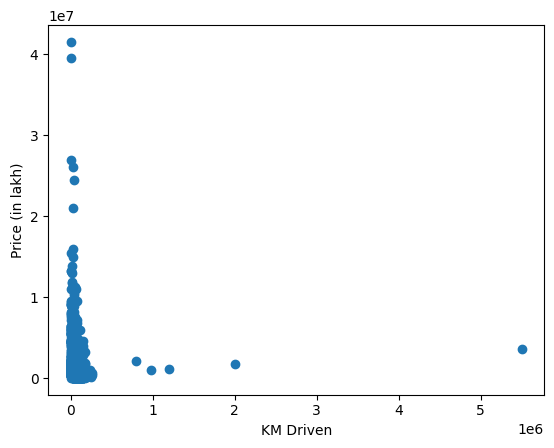

In [35]:
plt.scatter(car_df['km'], car_df['price'])
plt.xlabel('KM Driven')
plt.ylabel('Price (in lakh)')
plt.show()

In [36]:
#Calculating z-score
import numpy as np
from scipy import stats

numerical_cols = car_df.select_dtypes(include=['float64', 'int64']).columns

z_scores = stats.zscore(car_df[numerical_cols])
abs_z_scores = np.abs(z_scores)
outliers_z_score = (abs_z_scores > 3).any(axis=1)

car_df_with_outliers = car_df[outliers_z_score]
car_df_no_outliers = car_df[~outliers_z_score]

print("Number of rows with outliers using Z-score:", car_df_with_outliers.shape[0])

Number of rows with outliers using Z-score: 475


In [37]:
Q1 = car_df[numerical_cols].quantile(0.25)
Q3 = car_df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_condition = ((car_df[numerical_cols] < (Q1 - 1.5 * IQR)) |
                     (car_df[numerical_cols] > (Q3 + 1.5 * IQR)))

car_df_with_outliers = car_df[outlier_condition.any(axis=1)]
car_df_no_outliers = car_df[~outlier_condition.any(axis=1)]

print("Number of rows with outliers using IQR:", car_df_with_outliers.shape[0])

Number of rows with outliers using IQR: 3548


In [38]:
numerical_cols = car_df.select_dtypes(include=['float64', 'int64']).columns

categorical_cols = car_df.select_dtypes(include=['object']).columns
car_df = pd.get_dummies(car_df, columns=categorical_cols)

z_scores = stats.zscore(car_df[numerical_cols])
abs_z_scores = np.abs(z_scores)
outliers_z_score = (abs_z_scores > 3).any(axis=1)
car_df_no_outliers_z_score = car_df[~outliers_z_score]

Q1 = car_df[numerical_cols].quantile(0.25)
Q3 = car_df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = ((car_df[numerical_cols] < (Q1 - 1.5 * IQR)) |
                     (car_df[numerical_cols] > (Q3 + 1.5 * IQR)))
car_df_no_outliers_iqr = car_df[~outlier_condition.any(axis=1)]

print("Data shape after removing outliers using IQR:", car_df_no_outliers_iqr.shape)

Data shape after removing outliers using IQR: (4737, 15)


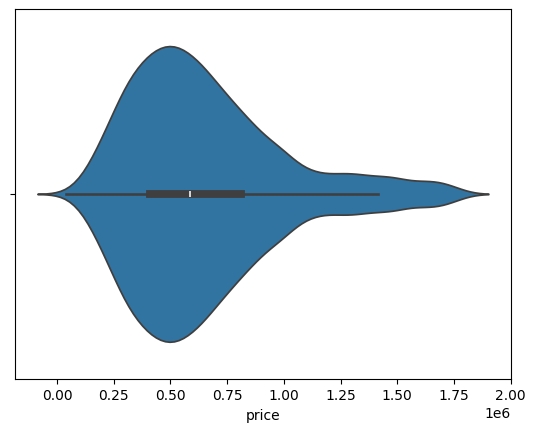

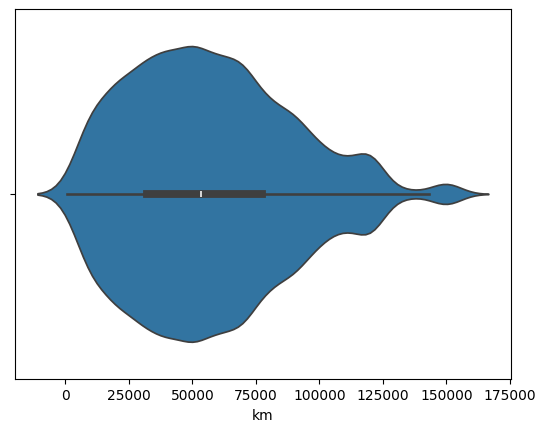

In [39]:

sns.violinplot(x=car_df_no_outliers_iqr['price'])
plt.show()

sns.violinplot(x=car_df_no_outliers_iqr['km'])
plt.show()

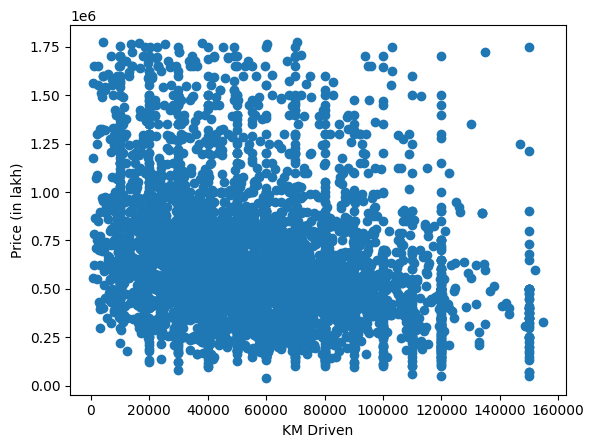

In [40]:
plt.scatter(car_df_no_outliers_iqr['km'], car_df_no_outliers_iqr['price'])
plt.xlabel('KM Driven')
plt.ylabel('Price (in lakh)')
plt.show()

C:\Users\rs\AppData\Local\Temp\ipykernel_18880\784854901.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(car_df_no_outliers_iqr['price'], shade=True, color='blue')


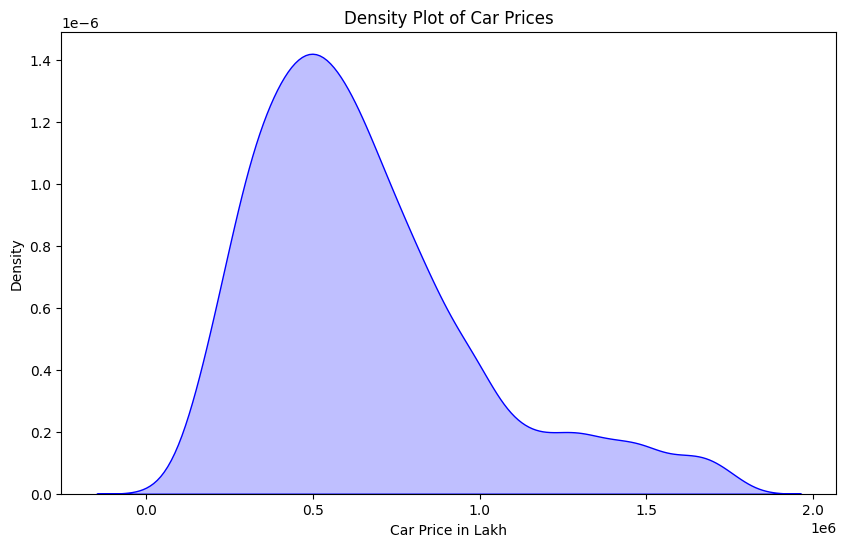

In [41]:
plt.figure(figsize=(10, 6))
sns.kdeplot(car_df_no_outliers_iqr['price'], shade=True, color='blue')
plt.title('Density Plot of Car Prices')
plt.xlabel('Car Price in Lakh')
plt.ylabel('Density')
plt.show()

In [42]:
skewness = skew(car_df_no_outliers_iqr['price'])
print(f"Skewness : {skewness}")

Skewness : 1.070156926693919


In [43]:
car_df_no_outliers_iqr.to_csv('car_df_no_outliers.csv',index=False)